In [1]:
import pandas as pd, numpy as np

In [16]:
df=pd.read_csv('Latest_df.csv',encoding='Latin-1')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     452583 non-null  int64  
 1   user           452583 non-null  object 
 2   date           452583 non-null  object 
 3   Tweets         452583 non-null  object 
 4   user_location  307280 non-null  object 
 5   tweets         452320 non-null  object 
 6   Subjectivity   452583 non-null  float64
 7   Polarity       452583 non-null  float64
 8   Status         452583 non-null  object 
 9   builder        452583 non-null  int64  
 10  website        452583 non-null  int64  
 11  hosting        452583 non-null  int64  
 12  software       452583 non-null  int64  
 13  security       452583 non-null  int64  
 14  page           452583 non-null  int64  
 15  web            452583 non-null  int64  
 16  domain         452583 non-null  int64  
 17  email          452583 non-nul

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     452583 non-null  int64  
 1   user           452583 non-null  object 
 2   date           452583 non-null  object 
 3   content        452583 non-null  object 
 4   user_location  307280 non-null  object 
 5   tweets         452554 non-null  object 
 6   Positive       452583 non-null  float64
 7   Negative       452583 non-null  float64
 8   Neutral        452583 non-null  float64
 9   Status         452583 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 34.5+ MB


In [4]:
df.drop(columns=['Unnamed: 0','tweets','Positive','Negative','Neutral','Status'],inplace=True)

In [5]:
data=df.copy()

In [64]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143981 entries, 0 to 152582
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user           143981 non-null  object
 1   Tweets         143981 non-null  object
 2   user_location  91493 non-null   object
 3   date           143981 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.5+ MB


In [89]:
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
df.rename(columns={'content':'Tweets'},inplace=True)

In [92]:
df.columns

Index(['user', 'date', 'Tweets', 'user_location', 'tweets', 'domain',
       'hosting', 'website', 'email', 'security', 'builder', 'wordpress',
       'marketing', 'service', 'app', 'SEO', 'server', 'webemail', 'ecommerce',
       'web'],
      dtype='object')

In [21]:
df=df[['user', 'date', 'Tweets', 'user_location', 'tweets',
       'Subjectivity', 'Polarity', 'Status', 'builder', 'website', 'hosting',
       'software', 'security', 'page', 'web', 'domain', 'email', 'wordpress',
       'support', 'site', 'service', 'subscribe']]

In [93]:
import re

In [66]:
nltk.download('stopwords')
#stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'RT[\s]+','',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('hxxps?://\S+|www\.\S+', '', text)
    text = re.sub('godaddy', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    #text = [stemmer.stem(word) for word in text.split(' ')]
    #text=" ".join(text)
    return text
df_2019["tweets"] = df_2019["Tweets"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-66-7badaf159c6a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["tweets"] = df_2019["Tweets"].apply(clean)


In [98]:
df.tail(20)

,user,date,Tweets,user_location,tweets,domain,hosting,website,email,security,builder,wordpress,marketing,service,app,SEO,server,webemail,ecommerce,web
452563,"{'username': 'TheRealShawnNFT', 'id': 13845708...",2022-09-23 05:39:05+00:00,@Eljaboom NFTs and Web3 is here to stay. Huge ...,"Colorado Springs, CO",nfts stay huge companies already space hiding...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
452564,"{'username': 'HostDotPromo', 'id': 10781618922...",2022-09-23 06:00:02+00:00,Check out the Chief Customer Officer of GoDadd...,Global,check chief customer officer host executive ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
452565,"{'username': 'AllExecJobs', 'id': 100179718089...",2022-09-23 06:00:04+00:00,GoDaddy is hiring Ã°ÂÂÂ Software Engineeri...,NaN,hiring software engineering manager remot...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
452566,"{'username': 'iDomainPrince', 'id': 1402333713...",2022-09-23 06:01:45+00:00,So now I've turned off @GoDaddy's #CashParking...,"Frankfurt am Main, Deutschland",ive turned cashparking canceling doesnt work d...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
452567,"{'username': 'baptistaresearc', 'id': 96367719...",2022-09-23 06:10:00+00:00,Check out our latest report on - GoDaddy Inc $...,NaN,check latest report inc gddy economy stocks ma...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
452568,"{'username': 'AllExecJobs', 'id': 100179718089...",2022-09-23 06:10:05+00:00,GoDaddy is looking for a Paid Search (SEM) Man...,NaN,looking paid search sem manager,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
452569,"{'username': 'frequencyfixx', 'id': 4066248553...",2022-09-23 06:20:04+00:00,Don't miss a beat! Get the latest updates and ...,"West Hollywood, CA",dont miss beat get latest updates subscribe em...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
452570,"{'username': 'KeriKelsey', 'id': 192494099, 'd...",2022-09-23 06:23:53+00:00,@GoDaddy So disappointed youÃ¢ÂÂre more inte...,NaN,disappointed you re interested getting new ...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
452571,"{'username': 'africangrillbar', 'id': 13153658...",2022-09-23 06:39:15+00:00,Proudly presenting https://t.co/cUupZMQHIE. Ch...,Lakewood & green valley Ranch,proudly presenting check let know think websit...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
452572,"{'username': 'hasdid', 'id': 386830764, 'displ...",2022-09-23 06:47:47+00:00,#Wordpress #Automated | Managed WooCommerce S...,NaN,wordpress automated managed woocommerce stores...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [31]:
df[~df["tweets"].isna()]['tweets']

0          go hell bob parsons spineless fuck stop cowar...
1                                              thanks fire 
2         proudly presenting  check let know think none ...
3         want boss donÂt need go biz school entreprene...
4         every cunty elephant killing  bob parsons hund...
                                ...                        
452578                          possible threat  phishing  
452579                                   possible threat   
452580                                           gamefi    
452581    adobe express u nawt hv layer something like c...
452582                                   possible threat   
Name: tweets, Length: 452320, dtype: object

In [38]:
df1=df[~df["tweets"].isna()]

In [35]:
#nltk.download('stopwords')
#stemmer = nltk.SnowballStemmer("english")
#from nltk.corpus import stopwords
import string
#stopword=set(stopwords.words('english'))

def clean(text):
#    text = str(text).lower()
#    text = re.sub('\[.*?\]', '', text)
#    text=re.sub(r'@[A-Za-z0-9]+','',text)
#    text=re.sub(r'#','',text)
#    text=re.sub(r'\n','',text)
#    text=re.sub(r'RT[\s]+','',text)
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('hxxps?://\S+|www\.\S+', '', text)
#    text = re.sub('godaddy', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#    text = re.sub('\n', '', text)
    text = re.sub(r'\W+', ' ', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ')]
    text=" ".join(text)
    text = re.sub("[Ã]","", text)
    text=re.sub("[^A-Za-z0-9'\s]","", text)
    #text = [stemmer.stem(word) for word in text.split(' ')]
    #text=" ".join(text)
    return text
df2 = df[~df["tweets"].isna()]['tweets'].apply(clean)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452320 entries, 0 to 452582
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user           452320 non-null  object 
 1   date           452320 non-null  object 
 2   Tweets         452320 non-null  object 
 3   user_location  307120 non-null  object 
 4   tweets         452320 non-null  object 
 5   Subjectivity   452320 non-null  float64
 6   Polarity       452320 non-null  float64
 7   Status         452320 non-null  object 
 8   builder        452320 non-null  int64  
 9   website        452320 non-null  int64  
 10  hosting        452320 non-null  int64  
 11  software       452320 non-null  int64  
 12  security       452320 non-null  int64  
 13  page           452320 non-null  int64  
 14  web            452320 non-null  int64  
 15  domain         452320 non-null  int64  
 16  email          452320 non-null  int64  
 17  wordpress      452320 non-nul

In [42]:
df1['Cleaned_Tweets']=df2

<ipython-input-42-bad2c411065e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cleaned_Tweets']=df2


In [45]:
df1.columns

Index(['user', 'date', 'Tweets', 'user_location', 'tweets', 'Subjectivity',
       'Polarity', 'Status', 'builder', 'website', 'hosting', 'software',
       'security', 'page', 'web', 'domain', 'email', 'wordpress', 'support',
       'site', 'service', 'subscribe', 'Cleaned_Tweets'],
      dtype='object')

In [48]:
df1=df1[['user', 'date', 'Tweets', 'user_location', 'Cleaned_Tweets']]

In [51]:
df1.to_csv('Data_Cleaned.csv')

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452320 entries, 0 to 452582
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user            452320 non-null  object
 1   date            452320 non-null  object
 2   Tweets          452320 non-null  object
 3   user_location   307120 non-null  object
 4   Cleaned_Tweets  452320 non-null  object
dtypes: object(5)
memory usage: 20.7+ MB


In [99]:
#Create a function to get the Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [100]:
#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [101]:
#Create two new columns #Hello
df['Subjectivity']=df['tweets'].apply(getSubjectivity)
df['Polarity']=df['tweets'].apply(getPolarity)

df

,user,date,Tweets,user_location,tweets,domain,hosting,website,email,security,...,marketing,service,app,SEO,server,webemail,ecommerce,web,Subjectivity,Polarity
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???Ã½???Â« ????,go hell bob parsons spineless fuck stop cowar...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.6,-0.4
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thanks fire,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.2,0.2
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proudly presenting check let know think none g...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.8
3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,So you want to be your own boss? You donÂ??t ...,Global,want boss don t need go biz school entrepreneu...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,For every cunty elephant killing #GoDaddy Bob ...,Surrey,every cunty elephant killing bob parsons hundr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.9,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452578,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:50:33+00:00,Possible threat on hxxps://rediction-carte-vit...,"Roma, Lazio",possible threat phishing,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.0
452579,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:55:09+00:00,Possible threat on hxxp://shivbets[.]com #god...,"Roma, Lazio",possible threat,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0.0
452580,"{'username': 'hytyjyu', 'id': 1551087273160036...",2022-09-23 08:02:29+00:00,@tsa_gamefi @MetascanPro @JoshMalina @whoisadd...,NaN,gamefi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
452581,"{'username': 'ARCH1V3S23', 'id': 1498900982209...",2022-09-23 08:04:14+00:00,adobe express why do u nawt hv a layer somethi...,"she/they, minor, works on Ã¢ÂÂ¡Ã¯Â¸Â",adobe express u nawt hv layer something like c...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [102]:
df[df['Polarity']>0.0].shape[0]/df.shape[0]

0.4487354085603113

In [103]:
df[df['Polarity']>0.0]

,user,date,Tweets,user_location,tweets,domain,hosting,website,email,security,...,marketing,service,app,SEO,server,webemail,ecommerce,web,Subjectivity,Polarity
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thanks fire,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.200000,0.200000
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proudly presenting check let know think none g...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.000000,0.800000
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,For every cunty elephant killing #GoDaddy Bob ...,Surrey,every cunty elephant killing bob parsons hundr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.900000,0.400000
5,"{'username': 'MccrelessTravis', 'id': 10715028...",2019-01-07 23:44:10+00:00,Proudly presenting https://t.co/EeTt0jt3B4. Ch...,"Mackinaw city, michigan",proudly presenting check let know think gocent...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.000000,0.800000
6,"{'username': 'joeczucha', 'id': 21409392, 'dis...",2019-01-07 23:43:23+00:00,@iamjeffperry @DanielCBerman @RosemaryOrchard ...,NaN,taken webfaction they re creating us accounts...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.502273,0.243182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452563,"{'username': 'TheRealShawnNFT', 'id': 13845708...",2022-09-23 05:39:05+00:00,@Eljaboom NFTs and Web3 is here to stay. Huge ...,"Colorado Springs, CO",nfts stay huge companies already space hiding...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.500000,0.200000
452567,"{'username': 'baptistaresearc', 'id': 96367719...",2022-09-23 06:10:00+00:00,Check out our latest report on - GoDaddy Inc $...,NaN,check latest report inc gddy economy stocks ma...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.900000,0.500000
452569,"{'username': 'frequencyfixx', 'id': 4066248553...",2022-09-23 06:20:04+00:00,Don't miss a beat! Get the latest updates and ...,"West Hollywood, CA",dont miss beat get latest updates subscribe em...,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0.900000,0.500000
452571,"{'username': 'africangrillbar', 'id': 13153658...",2022-09-23 06:39:15+00:00,Proudly presenting https://t.co/cUupZMQHIE. Ch...,Lakewood & green valley Ranch,proudly presenting check let know think websit...,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1.000000,0.800000


In [104]:
#Create a function to compute the negative, positive and neutral analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Status']=df['Polarity'].apply(getAnalysis)

df

,user,date,Tweets,user_location,tweets,domain,hosting,website,email,security,...,service,app,SEO,server,webemail,ecommerce,web,Subjectivity,Polarity,Status
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???Ã½???Â« ????,go hell bob parsons spineless fuck stop cowar...,0,0,0,0,0,...,0,0,0,0,0,0,0,0.6,-0.4,Negative
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thanks fire,0,0,0,0,0,...,0,0,0,0,0,0,0,0.2,0.2,Positive
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proudly presenting check let know think none g...,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.8,Positive
3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,So you want to be your own boss? You donÂ??t ...,Global,want boss don t need go biz school entrepreneu...,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,Neutral
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,For every cunty elephant killing #GoDaddy Bob ...,Surrey,every cunty elephant killing bob parsons hundr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0.9,0.4,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452578,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:50:33+00:00,Possible threat on hxxps://rediction-carte-vit...,"Roma, Lazio",possible threat phishing,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,Neutral
452579,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:55:09+00:00,Possible threat on hxxp://shivbets[.]com #god...,"Roma, Lazio",possible threat,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,Neutral
452580,"{'username': 'hytyjyu', 'id': 1551087273160036...",2022-09-23 08:02:29+00:00,@tsa_gamefi @MetascanPro @JoshMalina @whoisadd...,NaN,gamefi,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,Neutral
452581,"{'username': 'ARCH1V3S23', 'id': 1498900982209...",2022-09-23 08:04:14+00:00,adobe express why do u nawt hv a layer somethi...,"she/they, minor, works on Ã¢ÂÂ¡Ã¯Â¸Â",adobe express u nawt hv layer something like c...,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,Neutral


In [105]:
data=df.copy()

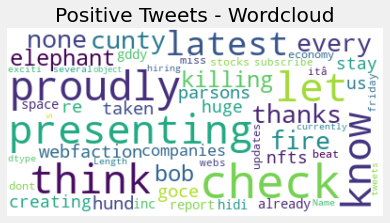

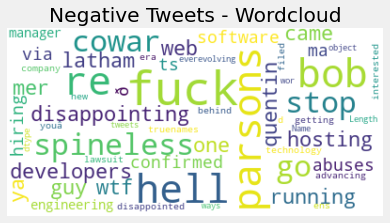

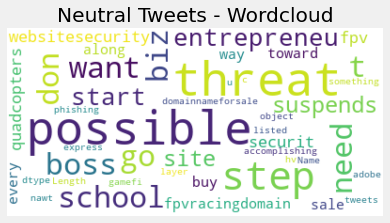

In [41]:
# let's create some wordclouds to see which words are the most used for each sentiment:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = data['tweets'][data["Status"] == 'Positive']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
negative_tweets = data['tweets'][data["Status"] == 'Negative']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with neutral tweets
neutral_tweets = data['tweets'][data["Status"] == 'Neutral']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
neutral_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(neutral_tweets))
plt.figure()
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

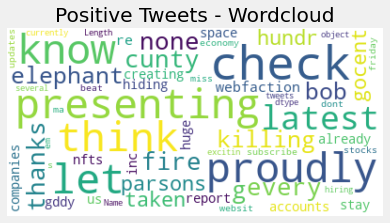

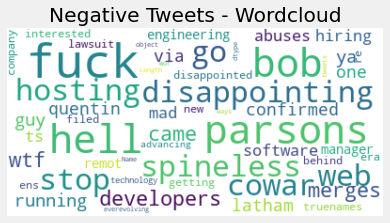

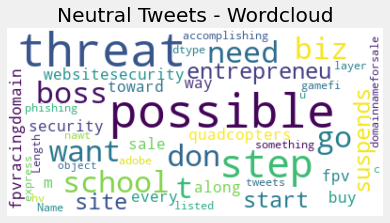

In [106]:
# let's create some wordclouds to see which words are the most used for each sentiment:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = data['tweets'][data["Status"] == 'Positive']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
negative_tweets = data['tweets'][data["Status"] == 'Negative']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with neutral tweets
neutral_tweets = data['tweets'][data["Status"] == 'Neutral']
stop_words = ["https", "co", "RT","user","@user"] + list(STOPWORDS)
neutral_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(neutral_tweets))
plt.figure()
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [107]:
df['Status'].value_counts(normalize=True)*100

Neutral     45.828617
Positive    44.873541
Negative     9.297842
Name: Status, dtype: float64

In [109]:
df[['Tweets','tweets']][df['Status']=='Positive'].head(80)

,Tweets,tweets
1,@hullboydan Thanks. Now how do I fire GoDaddy?,thanks fire
2,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,proudly presenting check let know think none g...
4,For every cunty elephant killing #GoDaddy Bob ...,every cunty elephant killing bob parsons hundr...
5,Proudly presenting https://t.co/EeTt0jt3B4. Ch...,proudly presenting check let know think gocent...
6,@iamjeffperry @DanielCBerman @RosemaryOrchard ...,taken webfaction they re creating us accounts...
...,...,...
175,@GoDaddy being able to send one email per minu...,able send one email per minute okay ineedhelp...
176,"@GoDaddy, if you find it fun to kill such a lo...",find fun kill loving creature really need see...
178,@GoDaddy Have you subscribed to our quarterly ...,subscribed quarterly newsletter sent last wee...
187,NEW YEARS RESOLUTION:\n\nÂ??Stay Kind.Â??\n?...,new years resolution stay kind stay humble sta...


In [110]:
df[['Tweets','tweets']][df['Status']=='Positive'].head(30)

,Tweets,tweets
1,@hullboydan Thanks. Now how do I fire GoDaddy?,thanks fire
2,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,proudly presenting check let know think none g...
4,For every cunty elephant killing #GoDaddy Bob ...,every cunty elephant killing bob parsons hundr...
5,Proudly presenting https://t.co/EeTt0jt3B4. Ch...,proudly presenting check let know think gocent...
6,@iamjeffperry @DanielCBerman @RosemaryOrchard ...,taken webfaction they re creating us accounts...
10,Proudly presenting https://t.co/1pIZlWJOvC. Ch...,proudly presenting check let know think none g...
11,Does @GoDaddy sell your contact info to spamme...,sell contact info spammers india since purcha...
14,Refer A Friend And Get A Free Lesson! https:/...,refer friend get free lesson via
16,Proudly presenting https://t.co/7mnaYgdR9J. Ch...,proudly presenting check let know think via
17,@dtcav @DesignationSix @GoDaddy Follow who Des...,follow designation says sponsor fox tweet eve...


In [111]:
df[['Tweets','tweets']][df['Status']=='Neutral'].head(80)

,Tweets,tweets
3,So you want to be your own boss? You donÂ??t ...,want boss don t need go biz school entrepreneu...
9,Where to Start When GoDaddy Suspends Your Site...,start suspends site websitesecurity security m...
12,https://t.co/OoOHJEZxtz \n\n#fpv #quadcopters ...,fpv quadcopters fpvracingdomain sale buy
13,Every step along the way is a step toward acco...,every step along way step toward accomplishing...
20,https://t.co/6EFVVSVc6v . . . #DomainNameForSa...,domainnameforsale listed
...,...,...
148,@hullboydan He resigned from GoDaddy in Octobe...,resigned october
149,Bye bye #webhosting #scottwagner #GoDaddy #ele...,bye bye webhosting scottwagner elephants domai...
150,@leilaclaire @FeministaJones @GoDaddy @faceboo...,saw
151,@kimberlynr @hullboydan I will not give GoDadd...,give penny money


In [112]:
df.iloc[182,:]

user             {'username': 'IsServiceDownAU', 'id': 86676070...
date                                     2019-01-07 18:05:32+00:00
Tweets           Â??Â?Â GoDaddy is having issues since 04:30...
user_location                                            Australia
tweets                           issues since aest rt also issues 
domain                                                           0
hosting                                                          0
website                                                          0
email                                                            0
security                                                         0
builder                                                          0
wordpress                                                        0
marketing                                                        0
service                                                          0
app                                                           

In [61]:
df1=df.copy()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user           452583 non-null  object 
 1   date           452583 non-null  object 
 2   Tweets         452583 non-null  object 
 3   user_location  307280 non-null  object 
 4   tweets         452583 non-null  object 
 5   Subjectivity   452583 non-null  float64
 6   Polarity       452583 non-null  float64
 7   Status         452583 non-null  object 
dtypes: float64(2), object(6)
memory usage: 27.6+ MB


In [63]:
df1.rename(columns={'tweets':'Clean_tweets'},inplace=True)

In [165]:
df.to_csv('df_with Clean tweets & Product-Service Related words from website_2.csv')

In [2]:
df=pd.read_csv('df_with Clean tweets & Product-Service Related words from website_2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452320 entries, 0 to 452319
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     452320 non-null  int64  
 1   user           452320 non-null  object 
 2   date           452320 non-null  object 
 3   Tweets         452320 non-null  object 
 4   user_location  307120 non-null  object 
 5   tweets         452320 non-null  object 
 6   domain         452320 non-null  int64  
 7   hosting        452320 non-null  int64  
 8   website        452320 non-null  int64  
 9   email          452320 non-null  int64  
 10  security       452320 non-null  int64  
 11  builder        452320 non-null  int64  
 12  wordpress      452320 non-null  int64  
 13  marketing      452320 non-null  int64  
 14  service        452320 non-null  int64  
 15  app            452320 non-null  int64  
 16  SEO            452320 non-null  int64  
 17  server         452320 non-nul

In [4]:
sentiment_counts = df.groupby(['Status']).size()
print(sentiment_counts)

Status
Negative     42056
Neutral     207292
Positive    202972
dtype: int64


<AxesSubplot:>

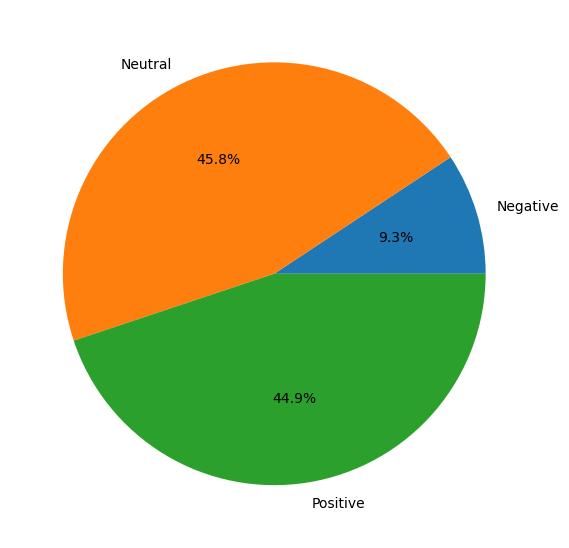

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

In [22]:
import collections

In [77]:
tweet_words_list=[]
for i in neutral_tweets:
    a=i.split()
    tweet_words_list.extend(a)

In [78]:
len(tweet_words_list)

1656757

In [72]:
#For Positive Words
filtered_words_spam = [word for word in tweet_words_list if word not in stop_words]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(50):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: via, count: 69366
Word: check, count: 62506
Word: know, count: 62170
Word: think, count: 60373
Word: let, count: 59068
Word: presenting, count: 58427
Word: proudly, count: 58248
Word: website, count: 46743
Word: builder, count: 25114
Word: domain, count: 24451
Word: websitebuilder, count: 18799
Word: new, count: 15854
Word: gocentral, count: 13334
Word: great, count: 12705
Word: hosting, count: 11656
Word: none, count: 11616
Word: site, count: 10584
Word: domains, count: 9524
Word: love, count: 8817
Word: business, count: 8636
Word: email, count: 8474
Word: job, count: 8034
Word: name, count: 8012
Word: thanks, count: 7714
Word: help, count: 7696
Word: free, count: 7621
Word: amp, count: 7561
Word: web, count: 7315
Word: best, count: 7082
Word: good, count: 7070
Word: dont, count: 6489
Word: marketing, count: 6221
Word: support, count: 6161
Word: wordpress, count: 6101
Word: one, count: 5874
Word: use, count: 5691
Word: latest, count: 5474
Word: updates, count: 5330
Word: us, cou

In [76]:
#For Negative Words
filtered_words_spam = [word for word in tweet_words_list if word not in stop_words]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(50):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: domain, count: 6236
Word: website, count: 4481
Word: support, count: 3454
Word: hosting, count: 3380
Word: service, count: 3291
Word: customer, count: 2843
Word: email, count: 2837
Word: site, count: 2811
Word: domains, count: 2505
Word: time, count: 2504
Word: business, count: 2503
Word: one, count: 2479
Word: help, count: 2452
Word: amp, count: 2235
Word: company, count: 2177
Word: small, count: 2068
Word: dont, count: 1969
Word: use, count: 1958
Word: bad, count: 1861
Word: worst, count: 1854
Word: im, count: 1796
Word: know, count: 1761
Word: via, count: 1711
Word: name, count: 1695
Word: still, count: 1619
Word: people, count: 1616
Word: even, count: 1543
Word: need, count: 1498
Word: new, count: 1494
Word: web, count: 1479
Word: account, count: 1478
Word: go, count: 1446
Word: us, count: 1356
Word: please, count: 1355
Word: want, count: 1344
Word: wordpress, count: 1329
Word: never, count: 1318
Word: back, count: 1285
Word: years, count: 1282
Word: days, count: 1231
Word: r

In [79]:
#For Neutral Words
filtered_words_spam = [word for word in tweet_words_list if word not in stop_words]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(50):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: domain, count: 22639
Word: posted, count: 21036
Word: de, count: 18851
Word: via, count: 17736
Word: website, count: 13948
Word: que, count: 12851
Word: domains, count: 9232
Word: threat, count: 8899
Word: ø¬ùø¯ø§ø¯ù, count: 8797
Word: hosting, count: 8594
Word: ø§ø³øªø¶ø§ùø©, count: 8348
Word: un, count: 8006
Word: web, count: 7937
Word: wordpress, count: 7451
Word: con, count: 7410
Word: en, count: 7061
Word: possible, count: 6920
Word: check, count: 6407
Word: name, count: 6347
Word: lo, count: 5995
Word: phishing, count: 5865
Word: site, count: 5706
Word: ø§ùù, count: 4713
Word: business, count: 4621
Word: vistazo, count: 4598
Word: opinas, count: 4582
Word: dinos, count: 4573
Word: â¡echa, count: 4561
Word: orgullo, count: 4498
Word: ø´ø±ø­, count: 4483
Word: ø´ø±ø§ø¡, count: 4305
Word: ùø§ùø¹, count: 4258
Word: la, count: 4222
Word: sale, count: 4158
Word: amp, count: 3993
Word: email, count: 3822
Word: el, count: 3713
Word: help, count: 3697
Word: domainnames, count:

In [63]:
df=df1.copy()

### Creation of Extra columns to specify 0/1 status of Service Related Keywords

In [62]:
def zero_one(word,search):
    if word.find(search)==-1:
        return 0
    else:
        return 1

In [95]:
df['builder']=df['tweets'].apply(lambda x: zero_one(x,'builder'))

In [96]:
df['website']=df['tweets'].apply(lambda x: zero_one(x,'website'))

In [104]:
df['hosting']=df['tweets'].apply(lambda x: zero_one(x,'hosting'))

In [106]:
df['software']=df['tweets'].apply(lambda x: zero_one(x,'software'))

In [107]:
df['websitesecurity']=df['tweets'].apply(lambda x: zero_one(x,'websitesecurity'))

In [108]:
df['security']=df['tweets'].apply(lambda x: zero_one(x,'security'))

In [109]:
df['page']=df['tweets'].apply(lambda x: zero_one(x,'page'))

In [110]:
df['web']=df['tweets'].apply(lambda x: zero_one(x,'web'))

In [111]:
df['domain']=df['tweets'].apply(lambda x: zero_one(x,'domain'))

In [112]:
df['email']=df['tweets'].apply(lambda x: zero_one(x,'email'))

In [113]:
df['wordpress']=df['tweets'].apply(lambda x: zero_one(x,'wordpress'))

In [114]:
df['phishing']=df['tweets'].apply(lambda x: zero_one(x,'phishing'))

In [115]:
df['support']=df['tweets'].apply(lambda x: zero_one(x,'support'))

In [116]:
df['site']=df['tweets'].apply(lambda x: zero_one(x,'site'))

In [117]:
df['domain']=df['tweets'].apply(lambda x: zero_one(x,'domain'))

In [118]:
df['service']=df['tweets'].apply(lambda x: zero_one(x,'service'))

In [119]:
df['subscribe']=df['tweets'].apply(lambda x: zero_one(x,'subscribe'))

In [68]:
df.rename(columns={'Cleaned_Tweets':'tweets'},inplace=True)

In [65]:
def zero_one(word,search):
    if word.find(search)==-1:
        return 0
    else:
        return 1

In [69]:
df['domain']=df['tweets'].apply(lambda x: zero_one(x,'domain'))

In [70]:
df['hosting']=df['tweets'].apply(lambda x: zero_one(x,'hosting'))

In [71]:
df['website']=df['tweets'].apply(lambda x: zero_one(x,'website'))

In [72]:
df['email']=df['tweets'].apply(lambda x: zero_one(x,'email'))

In [73]:
df['security']=df['tweets'].apply(lambda x: zero_one(x,'security'))

In [74]:
df['builder']=df['tweets'].apply(lambda x: zero_one(x,'builder'))

In [75]:
df['wordpress']=df['tweets'].apply(lambda x: zero_one(x,'wordpress'))

In [76]:
df['marketing']=df['tweets'].apply(lambda x: zero_one(x,'marketing'))

In [77]:
df['service']=df['tweets'].apply(lambda x: zero_one(x,'service'))

In [78]:
df['app']=df['tweets'].apply(lambda x: zero_one(x,'app'))

In [117]:
df['SEO']=df['tweets'].apply(lambda x: zero_one(x,'seo'))

In [80]:
df['server']=df['tweets'].apply(lambda x: zero_one(x,'server'))

In [81]:
df['webemail']=df['tweets'].apply(lambda x: zero_one(x,'webmail'))

In [82]:
df['ecommerce']=df['tweets'].apply(lambda x: zero_one(x,'ecommerce'))

In [84]:
df['web']=df['tweets'].apply(lambda x: zero_one(x,'web'))

In [85]:
df.columns

Index(['user', 'date', 'Tweets', 'user_location', 'tweets', 'domain',
       'hosting', 'website', 'email', 'security', 'builder', 'wordpress',
       'marketing', 'service', 'app', 'SEO', 'server', 'webemail', 'ecommerce',
       'web'],
      dtype='object')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user             452583 non-null  object 
 1   date             452583 non-null  object 
 2   Tweets           452583 non-null  object 
 3   user_location    307280 non-null  object 
 4   tweets           452583 non-null  object 
 5   Subjectivity     452583 non-null  float64
 6   Polarity         452583 non-null  float64
 7   Status           452583 non-null  object 
 8   builder          452583 non-null  int64  
 9   website          452583 non-null  int64  
 10  hosting          452583 non-null  int64  
 11  software         452583 non-null  int64  
 12  websitesecurity  452583 non-null  int64  
 13  security         452583 non-null  int64  
 14  page             452583 non-null  int64  
 15  web              452583 non-null  int64  
 16  domain           452583 non-null  int6

In [ ]:
#Sentiment Analysis of Tweets containing these keywords taken seperately

Status
Negative     7024
Neutral     32451
Positive    28431
dtype: int64


<AxesSubplot:>

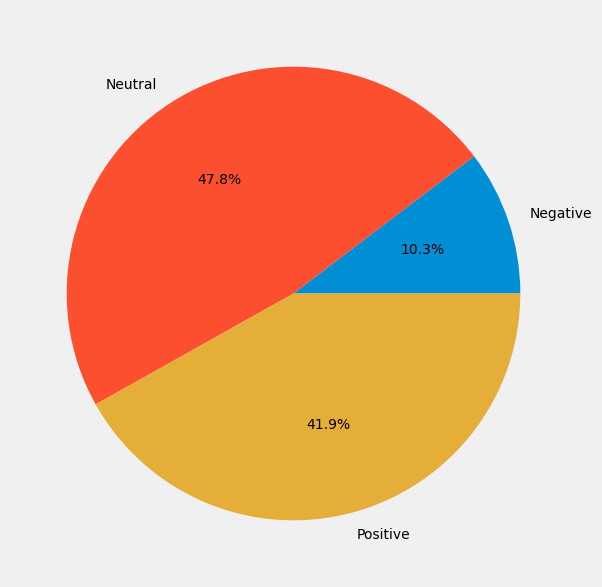

In [89]:
sentiment_counts = df_2022.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

In [128]:
df['security'].value_counts()

0    446738
1      5845
Name: security, dtype: int64

In [98]:
df['builder'].value_counts()

0    403996
1     48587
Name: builder, dtype: int64

In [97]:
df['website'].value_counts()

0    364151
1     88432
Name: website, dtype: int64

In [103]:
df.iloc[1008,:]

user             {'username': 'frog_leaping', 'id': 10508497073...
date                                     2019-01-06 18:21:01+00:00
Tweets           My answer to Can we do SEO for websites that a...
user_location                                 Uttar Pradesh, India
tweets              answer seo websites made  wix website builder 
Subjectivity                                                   0.0
Polarity                                                       0.0
Status                                                     Neutral
builder                                                          1
website                                                          1
Name: 1008, dtype: object

## Seperate Dataframes containing tweets containing each Keyword

In [138]:
df_builder=df[df['builder']==1]

In [140]:
df_website=df[df['website']==1]
df_hosting=df[df['hosting']==1]
df_software=df[df['software']==1]
df_websitesecurity=df[df['websitesecurity']==1]
df_security=df[df['security']==1]
df_page=df[df['page']==1]
df_web=df[df['web']==1]
df_domain=df[df['domain']==1]
df_email=df[df['email']==1]
df_wordpress=df[df['wordpress']==1]
df_phishing=df[df['phishing']==1]
df_support=df[df['support']==1]
df_site=df[df['site']==1]
df_service=df[df['service']==1]
df_subscribe=df[df['subscribe']==1]

## Sentiment Analysis plot for Each Keyword

Status
Negative      388
Neutral      4062
Positive    44137
dtype: int64


<AxesSubplot:>

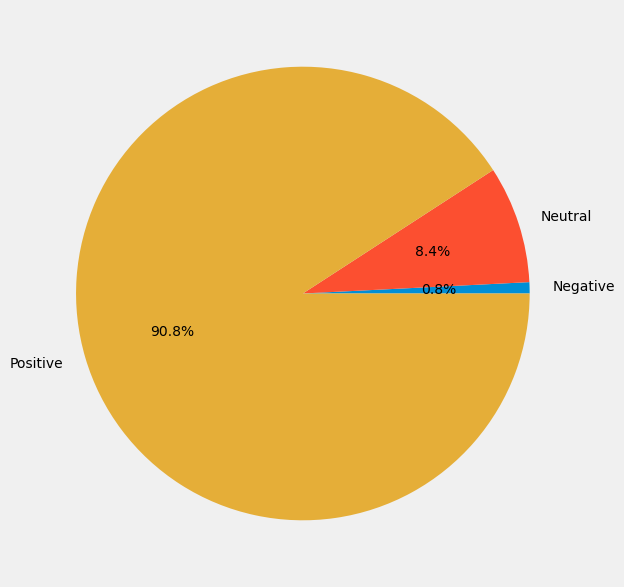

In [142]:
#builder
sentiment_counts = df_builder.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     4918
Neutral     17694
Positive    65820
dtype: int64


<AxesSubplot:>

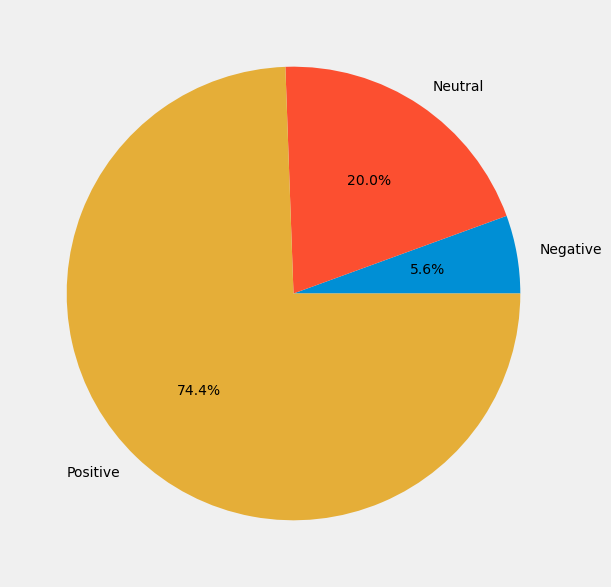

In [143]:
#website
sentiment_counts = df_website.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     3279
Neutral      9137
Positive    10143
dtype: int64


<AxesSubplot:>

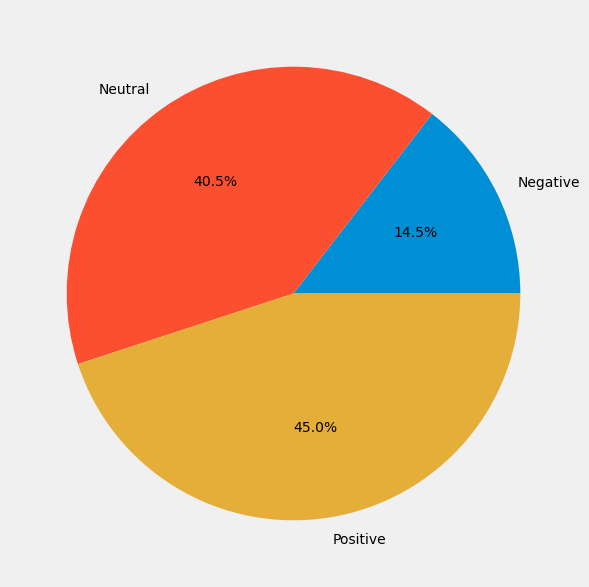

In [144]:
#hosting
sentiment_counts = df_hosting.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative    244
Neutral     706
Positive    531
dtype: int64


<AxesSubplot:>

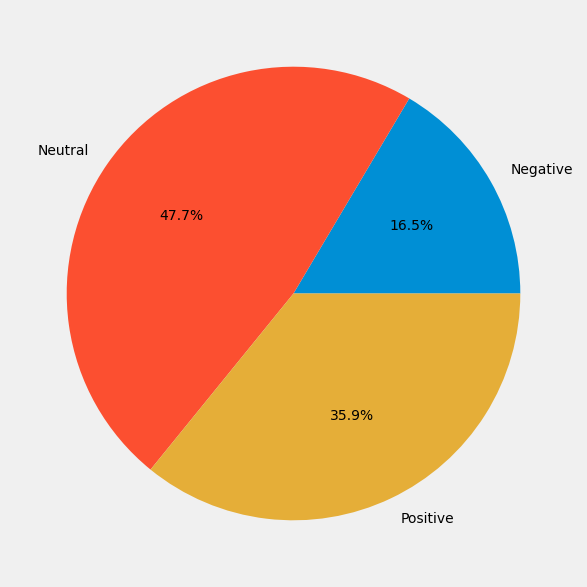

In [145]:
#software
sentiment_counts = df_software.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     953
Neutral     3032
Positive    1860
dtype: int64


<AxesSubplot:>

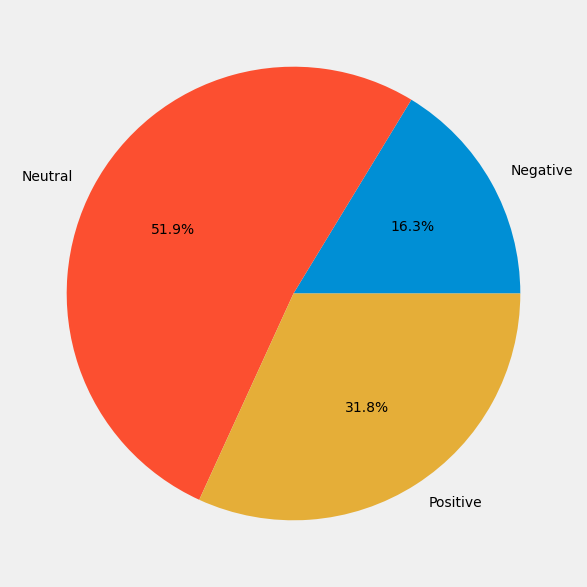

In [147]:
#security
sentiment_counts = df_security.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     839
Neutral     2497
Positive    2931
dtype: int64


<AxesSubplot:>

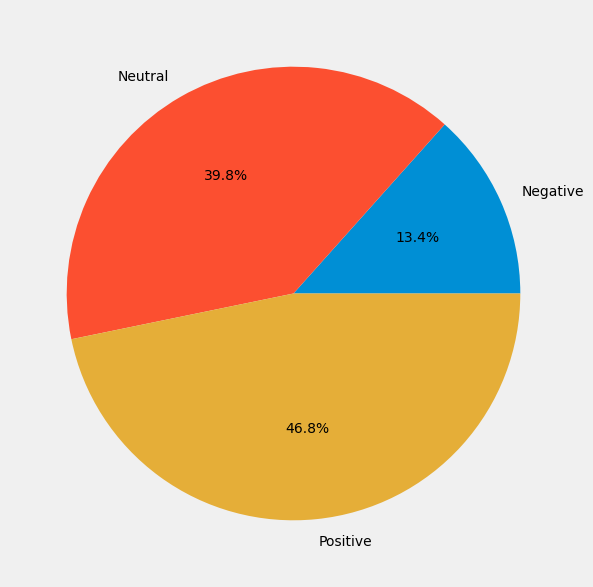

In [148]:
#page
sentiment_counts = df_page.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     6525
Neutral     28339
Positive    73679
dtype: int64


<AxesSubplot:>

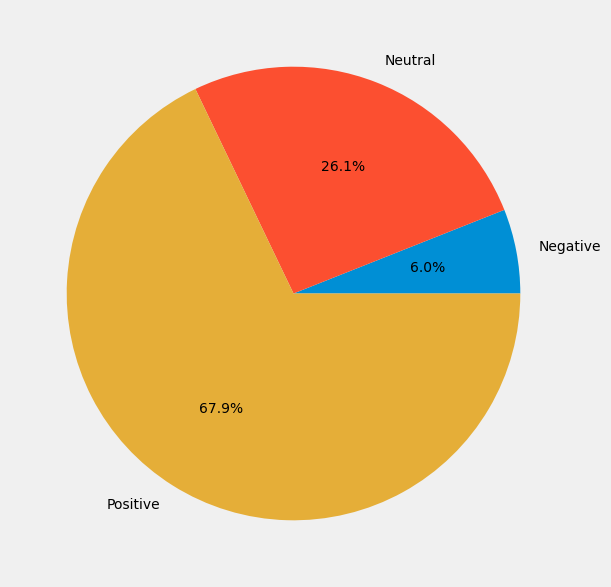

In [149]:
#web
sentiment_counts = df_web.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     7090
Neutral     29847
Positive    26378
dtype: int64


<AxesSubplot:>

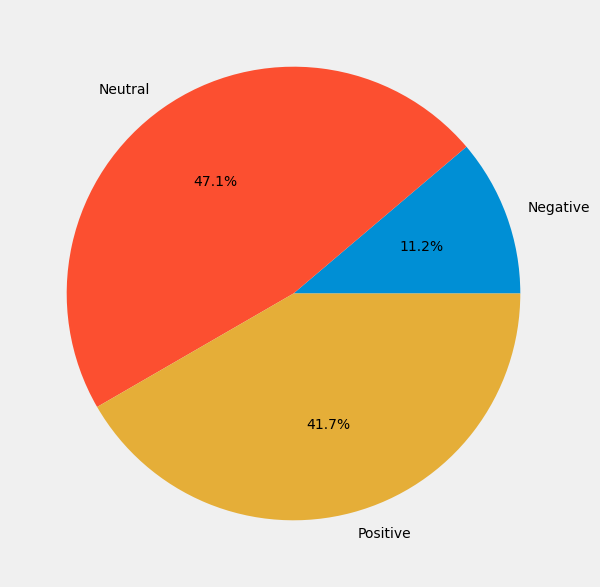

In [152]:
#domain
sentiment_counts = df_domain.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative    2992
Neutral     4123
Positive    8161
dtype: int64


<AxesSubplot:>

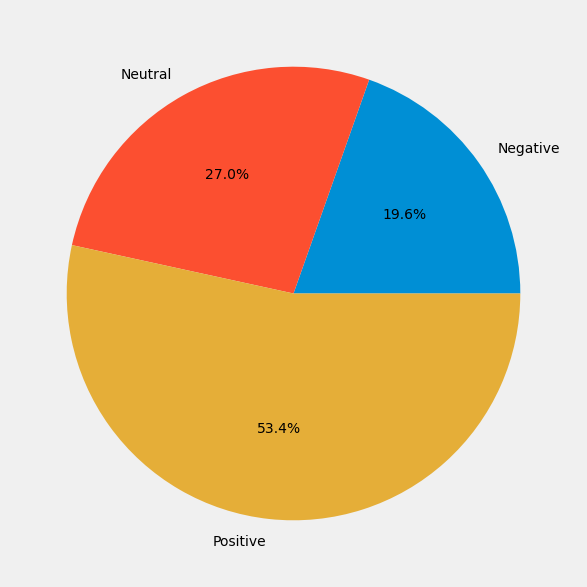

In [153]:
#email
sentiment_counts = df_email.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative    1241
Neutral     7151
Positive    5550
dtype: int64


<AxesSubplot:>

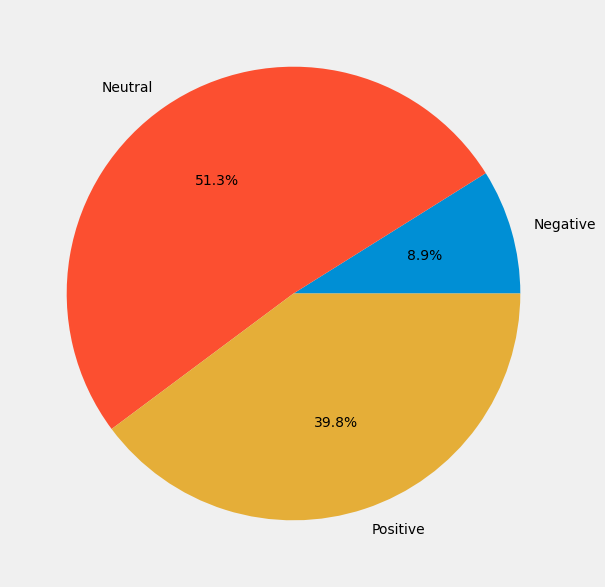

In [154]:
#wordpress
sentiment_counts = df_wordpress.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative    3248
Neutral     2911
Positive    6194
dtype: int64


<AxesSubplot:>

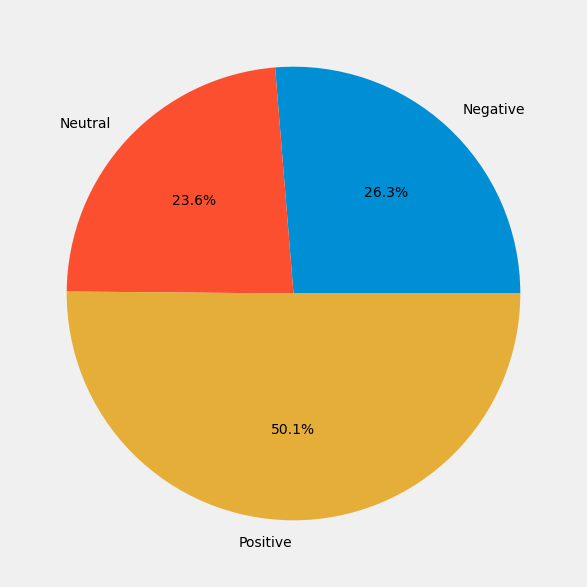

In [156]:
#support
sentiment_counts = df_support.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative     7942
Neutral     25164
Positive    75704
dtype: int64


<AxesSubplot:>

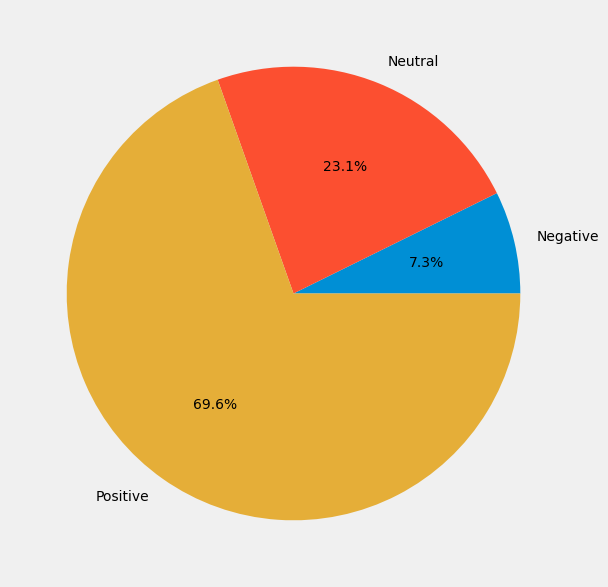

In [157]:
#site
sentiment_counts = df_site.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative    4181
Neutral     4545
Positive    7520
dtype: int64


<AxesSubplot:>

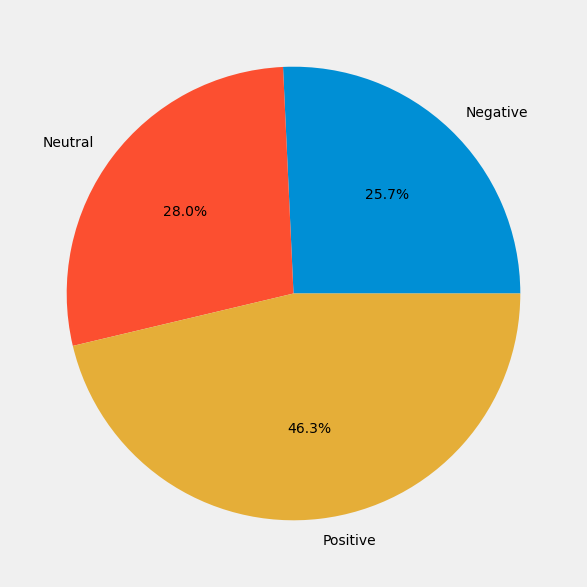

In [158]:
#service
sentiment_counts = df_service.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

Status
Negative      62
Neutral      170
Positive    3355
dtype: int64


<AxesSubplot:>

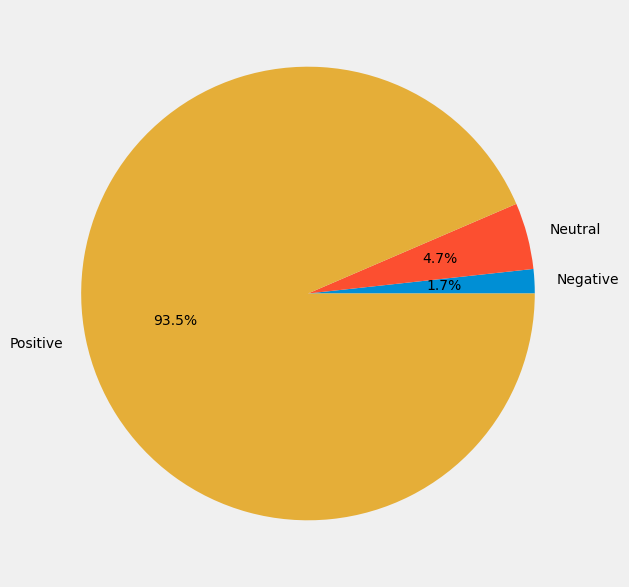

In [159]:
#subscribe
sentiment_counts = df_subscribe.groupby(['Status']).size()
print(sentiment_counts)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=360, fontsize=10, label="")

In [163]:
df.columns

Index(['user', 'date', 'Tweets', 'user_location', 'tweets', 'Subjectivity',
       'Polarity', 'Status', 'builder', 'website', 'hosting', 'software',
       'security', 'page', 'web', 'domain', 'email', 'wordpress', 'support',
       'site', 'service', 'subscribe'],
      dtype='object')

In [ ]:
#Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [167]:
df.to_csv('Latest_df.csv')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user           452583 non-null  object 
 1   date           452583 non-null  object 
 2   Tweets         452583 non-null  object 
 3   user_location  307280 non-null  object 
 4   tweets         452583 non-null  object 
 5   Subjectivity   452583 non-null  float64
 6   Polarity       452583 non-null  float64
 7   Status         452583 non-null  object 
 8   builder        452583 non-null  int64  
 9   website        452583 non-null  int64  
 10  hosting        452583 non-null  int64  
 11  software       452583 non-null  int64  
 12  security       452583 non-null  int64  
 13  page           452583 non-null  int64  
 14  web            452583 non-null  int64  
 15  domain         452583 non-null  int64  
 16  email          452583 non-null  int64  
 17  wordpress      452583 non-nul

### Segregating dataframe df(prior to model) year-wise code

In [22]:
data=df.copy()

In [23]:
df.columns

Index(['user', 'date', 'Tweets', 'user_location'], dtype='object')

In [12]:
df['date']=pd.to_datetime(df['date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user           452583 non-null  object
 1   date           452583 non-null  object
 2   Tweets         452583 non-null  object
 3   user_location  307280 non-null  object
dtypes: object(4)
memory usage: 13.8+ MB


In [16]:
df.head(2)

,user,date,Tweets,user_location
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN


In [18]:
df['date']=df['date'].astype('datetime64[ns]')

In [27]:
df.head(3)

,user,date,Tweets,user_location
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA"


In [25]:
from datetime import datetime

In [71]:
df=pd.read_csv('Latest_df.csv')

In [73]:
df['date']=df['date'].astype('datetime64[ns]')

In [74]:
df.head(3)

,Unnamed: 0,user,date,Tweets,user_location,tweets,Subjectivity,Polarity,Status,builder,...,security,page,web,domain,email,wordpress,support,site,service,subscribe
0,0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????,go hell bob parsons spineless fuck stop cowar...,0.6,-0.4,Negative,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thanks fire,0.2,0.2,Positive,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proudly presenting check let know think none ...,1.0,0.8,Positive,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df['date']=df['date'].dt.date
df['date']

0         2019-01-07
1         2019-01-07
2         2019-01-07
3         2019-01-07
4         2019-01-07
             ...    
452578    2022-09-23
452579    2022-09-23
452580    2022-09-23
452581    2022-09-23
452582    2022-09-23
Name: date, Length: 452583, dtype: object

In [76]:
df['date']=df['date'].astype('str')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452583 entries, 0 to 452582
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user           452583 non-null  object        
 1   date           452583 non-null  object        
 2   Tweets         452583 non-null  object        
 3   user_location  307280 non-null  object        
 4   date2          452583 non-null  datetime64[ns]
 5   Year           452583 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 20.7+ MB


In [44]:
df.head(5)

,user,date,Tweets,user_location,date2,Year
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????,2019-01-07,2019-01-07
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,2019-01-07,2019-01-07
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",2019-01-07,2019-01-07
3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,So you want to be your own boss? You don??t n...,Global,2019-01-07,2019-01-07
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,For every cunty elephant killing #GoDaddy Bob ...,Surrey,2019-01-07,2019-01-07


In [78]:
def fun(date):
    datem = datetime.strptime(date, "%Y-%m-%d")
    return (datem.year)

In [79]:
df['date1']=df['date'].apply(fun)

In [81]:
df[['date','date1']]

,date,date1
0,2019-01-07,2019
1,2019-01-07,2019
2,2019-01-07,2019
3,2019-01-07,2019
4,2019-01-07,2019
...,...,...
452578,2022-09-23,2022
452579,2022-09-23,2022
452580,2022-09-23,2022
452581,2022-09-23,2022


In [82]:
df_2019=df[df['date1']==2019]
df_2020=df[df['date1']==2020]
df_2021=df[df['date1']==2021]
df_2022=df[df['date1']==2022]

In [83]:
df_2019.head(10)

,Unnamed: 0,user,date,Tweets,user_location,tweets,Subjectivity,Polarity,Status,builder,...,page,web,domain,email,wordpress,support,site,service,subscribe,date1
0,0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???ý???« ????,go hell bob parsons spineless fuck stop cowar...,0.600000,-0.400000,Negative,0,...,0,0,0,0,0,0,0,0,0,2019
1,1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thanks fire,0.200000,0.200000,Positive,0,...,0,0,0,0,0,0,0,0,0,2019
2,2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proudly presenting check let know think none ...,1.000000,0.800000,Positive,0,...,0,0,0,0,0,0,0,0,0,2019
3,3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07,So you want to be your own boss? You don??t n...,Global,want boss dont need go biz school entrepreneu...,0.000000,0.000000,Neutral,0,...,0,0,0,0,0,0,0,0,0,2019
4,4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07,For every cunty elephant killing #GoDaddy Bob ...,Surrey,every cunty elephant killing bob parsons hund...,0.900000,0.400000,Positive,0,...,0,0,0,0,0,0,0,0,0,2019
5,5,"{'username': 'MccrelessTravis', 'id': 10715028...",2019-01-07,Proudly presenting https://t.co/EeTt0jt3B4. Ch...,"Mackinaw city, michigan",proudly presenting check let know think goce...,1.000000,0.800000,Positive,0,...,0,0,0,0,0,0,0,0,0,2019
6,6,"{'username': 'joeczucha', 'id': 21409392, 'dis...",2019-01-07,@iamjeffperry @DanielCBerman @RosemaryOrchard ...,NaN,taken webfaction theyre creating us a...,0.502273,0.243182,Positive,0,...,0,1,0,0,0,0,0,0,0,2019
7,7,"{'username': 'joeczucha', 'id': 21409392, 'dis...",2019-01-07,@bergus @webfaction @GoDaddy Very disappointin...,NaN,disappointing web hosting developers mer...,0.850000,-0.300000,Negative,0,...,0,1,0,0,0,0,0,0,0,2019
8,8,"{'username': 'ichrs', 'id': 13260102, 'display...",2019-01-07,"Wtf @webfaction, I came to you running from go...","Washington, USA",wtf came running,1.000000,-0.500000,Negative,0,...,0,0,0,0,0,0,0,0,0,2019
9,9,"{'username': 'malcaresecurity', 'id': 74260895...",2019-01-07,Where to Start When GoDaddy Suspends Your Site...,World,start suspends site websitesecurity securit...,0.000000,0.000000,Neutral,0,...,0,1,0,0,0,0,1,0,0,2019


In [90]:
df_2019.to_csv('df_2019.csv')
df_2020.to_csv('df_2020.csv')
df_2021.to_csv('df_2021.csv')
df_2022.to_csv('df_2022.csv')

In [97]:
df_2019['Status'].value_counts()

Positive    67220
Neutral     67220
Negative     9541
Name: Status, dtype: int64

In [95]:
data_powerbi=pd.DataFrame(data={'2019':df_2019['Status'].value_counts(),'2020':df_2020['Status'].value_counts(),'2021':df_2021['Status'].value_counts(),'2022':df_2022['Status'].value_counts()})

In [96]:
data_powerbi

,2019,2020,2021,2022
Negative,9541,12995,12194,7024
Neutral,67220,55888,53105,32451
Positive,67220,63223,43291,28431


In [98]:
data_powerbi.to_csv('data_powerbi.csv')

In [100]:
df_2019['Status'].value_counts()

Positive    67220
Neutral     67220
Negative     9541
Name: Status, dtype: int64

### Seperate Dataframes containing tweets containing each Product & Service Related words

In [115]:
df.columns

Index(['user', 'date', 'Tweets', 'user_location', 'tweets', 'domain',
       'hosting', 'website', 'email', 'security', 'builder', 'wordpress',
       'marketing', 'service', 'app', 'SEO', 'server', 'webemail', 'ecommerce',
       'web', 'Subjectivity', 'Polarity', 'Status'],
      dtype='object')

In [119]:
df_domain=df[df['domain']==1]
df_hosting=df[df['hosting']==1]
df_website=df[df['website']==1]
df_email=df[df['email']==1]
df_security=df[df['security']==1]
df_builder=df[df['builder']==1]
df_wordpress=df[df['wordpress']==1]
df_marketing=df[df['marketing']==1]
df_service=df[df['service']==1]
df_app=df[df['app']==1]
df_seo=df[df['SEO']==1]
df_server=df[df['server']==1]
df_webemail=df[df['webemail']==1]
df_ecommerce=df[df['ecommerce']==1]
df_web=df[df['web']==1]

In [160]:
df_marketing['Status'].value_counts()

Positive    7190
Neutral     3595
Negative     602
Name: Status, dtype: int64

In [162]:
df4=pd.read_csv("df_with Clean tweets & Product-Service Related words from website.csv")

In [163]:
df4.head(4)

,Unnamed: 0,user,date,Tweets,user_location,Cleaned_Tweets
0,0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,@GoDaddy go to hell Bob Parsons you spineless ...,Riviera Maya / CDMX ???Ã½???Â« ????,go hell bob parsons spineless fuck stop cowar...
1,1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,@hullboydan Thanks. Now how do I fire GoDaddy?,NaN,thanks fire
2,2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,Proudly presenting https://t.co/CYm5KyZBPk. Ch...,"Colorado, USA",proudly presenting check let know think none g...
3,3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,So you want to be your own boss? You donÂ??t ...,Global,want boss don t need go biz school entrepreneu...
